Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing and Treating Data

In [2]:
dataset = pd.read_csv('..\data\creditcard.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adans\AppData\Local\Temp\ipykernel_25668\2611480004.py:1: SyntaxWarning: invalid escape sequence '\d'
  dataset = pd.read_csv('..\data\creditcard.csv')


In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
pd.set_option('display.max_rows', None)    # mostra todas as linhas
pd.set_option('display.max_columns', None) # mostra todas as colunas

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Treating duplicates

In [6]:
dataset.duplicated().value_counts()

False    283726
True       1081
Name: count, dtype: int64

In [7]:
dataset = dataset.drop_duplicates()

Treating transactions which 'Amount == 0'

In [8]:
len(dataset[dataset['Amount'] == 0])

1808

In [9]:
dataset = dataset.drop(dataset[dataset['Amount'] == 0].index)

Verifying null values

In [10]:
dataset.isna().any(axis = 1).value_counts()

False    281918
Name: count, dtype: int64

Veryfing Target Class Balance

In [11]:
print(dataset['Class'].value_counts(normalize = 1)*100)

Class
0    99.841089
1     0.158911
Name: proportion, dtype: float64


## Exploratory and Descriptive Analysis

In [38]:
dataset[dataset['Amount'] == 0.01]['Class'].value_counts()

Class
0    713
1      5
Name: count, dtype: int64

###  Analysis of Fraudulent Transactions Values


Fraudulent Transactions Describing

In [13]:
dataset.query('Class == 1')['Amount'].describe()

count     448.000000
mean      130.784353
std       265.688950
min         0.010000
25%         1.000000
50%        17.225000
75%       111.857500
max      2125.870000
Name: Amount, dtype: float64

<Axes: xlabel='Amount'>

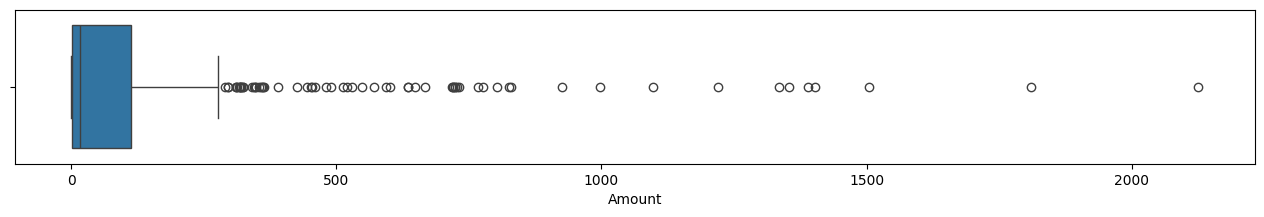

In [14]:
fig, ax = plt.subplots(figsize = (16,2))
sns.boxplot(data = dataset.query('Class == 1'), x = 'Amount', orient = 'h' )

Non-fraudulent Transactions Describing

In [15]:
dataset.query('Class == 0')['Amount'].describe()

count    281470.000000
mean         88.973639
std         251.071582
min           0.010000
25%           5.990000
50%          22.520000
75%          78.007500
max       25691.160000
Name: Amount, dtype: float64

All Transactions Describing

In [16]:
dataset['Amount'].describe()

count    281918.000000
mean         89.040081
std         251.100510
min           0.010000
25%           5.990000
50%          22.500000
75%          78.200000
max       25691.160000
Name: Amount, dtype: float64

### Divinding Transactions into 4 value groups:
-   0-$500
-   $500 - $5,000
-   $5,000 - $10,000
-   Greater than $10,000

Text(0.5, 1.0, 'Frequency distribution - Purchases under 500$')

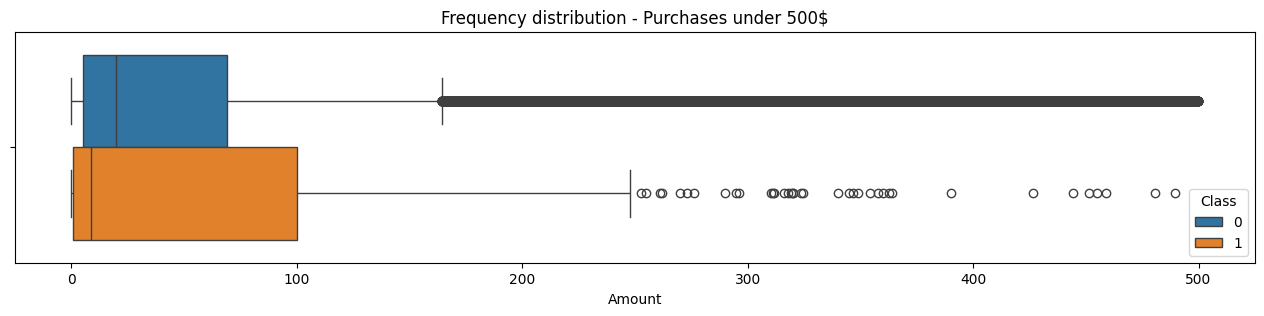

In [17]:
fig, ax = plt.subplots(figsize = (16,3))
sns.boxplot(data = dataset.query('Amount < 500'), x = 'Amount', orient = 'h', hue = 'Class')
ax.set_title('Frequency distribution - Purchases under 500$')

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\adans\AppData\Local\Temp\ipykernel_25668\3579719554.py:3: SyntaxWarning: invalid escape sequence '\$'
  ax.set_title('Frequency distribution - Purchases between 500\$ - 5,000\$')


Text(0.5, 1.0, 'Frequency distribution - Purchases between 500\\$ - 5,000\\$')

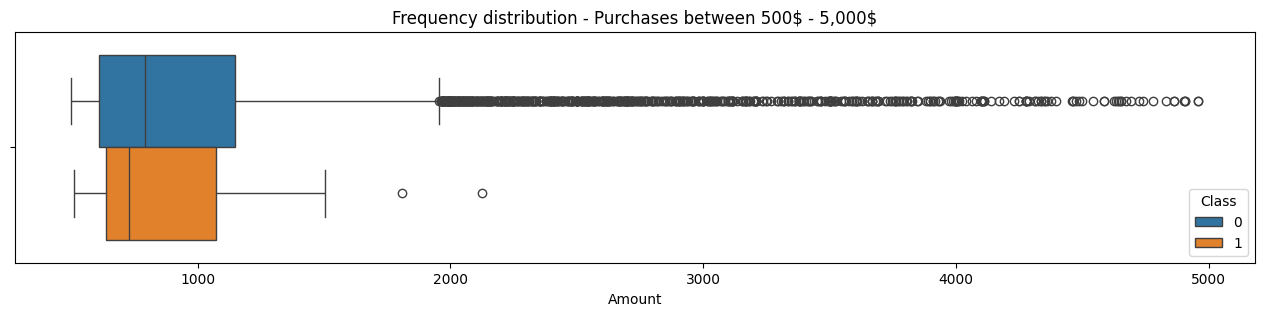

In [18]:
fig, ax = plt.subplots(figsize = (16,3))
sns.boxplot(data = dataset.query('Amount > 500 & Amount < 5000'), x = 'Amount', orient = 'h', hue = 'Class')
ax.set_title('Frequency distribution - Purchases between 500\$ - 5,000\$')

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\adans\AppData\Local\Temp\ipykernel_25668\324101105.py:3: SyntaxWarning: invalid escape sequence '\$'
  ax.set_title('Frequency distribution - Purchases between 5,000\$ and 10,000\$')


Text(0.5, 1.0, 'Frequency distribution - Purchases between 5,000\\$ and 10,000\\$')

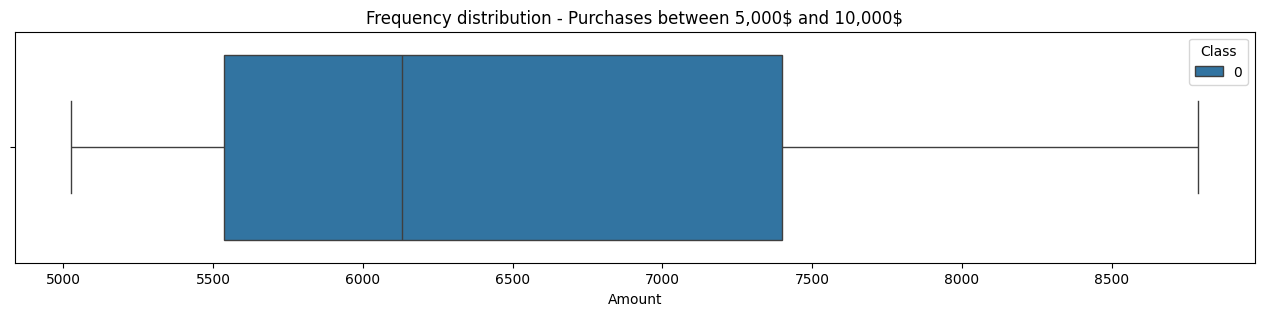

In [19]:
fig, ax = plt.subplots(figsize = (16,3))
sns.boxplot(data = dataset.query('Amount > 5000 & Amount < 10000'), x = 'Amount', orient = 'h', hue = 'Class')
ax.set_title('Frequency distribution - Purchases between 5,000\$ and 10,000\$')

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\adans\AppData\Local\Temp\ipykernel_25668\2907940855.py:3: SyntaxWarning: invalid escape sequence '\$'
  ax.set_title('Frequency distribution - Purchases over 10,000\$')


Text(0.5, 1.0, 'Frequency distribution - Purchases over 10,000\\$')

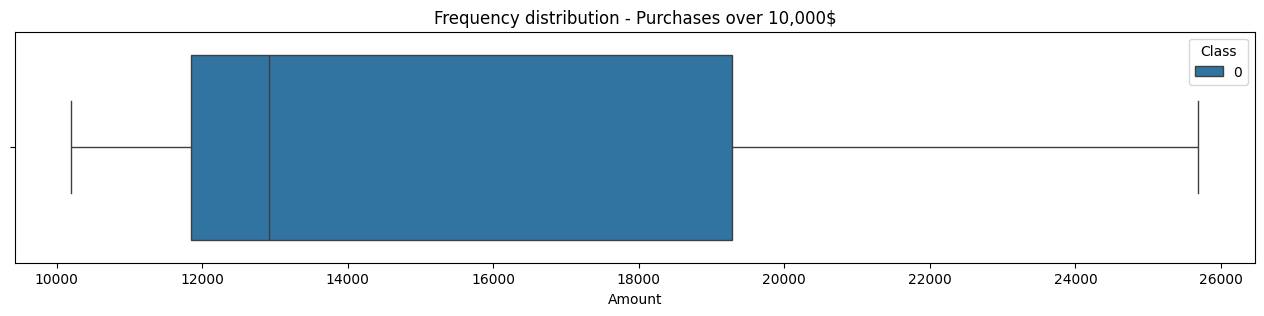

In [20]:
fig, ax = plt.subplots(figsize = (16,3))
sns.boxplot(data = dataset.query('Amount > 10000'), x = 'Amount', orient = 'h', hue = 'Class')
ax.set_title('Frequency distribution - Purchases over 10,000\$')

In [40]:
df = dataset.copy()
df['Value_Category'] = pd.cut(df['Amount'], [0,500,5000,10000,30000],['0-500', '500-5,000', '5,000-10,000', '10,000 +'])

All Transactions per Value Category

In [41]:
df['Value_Category'].value_counts().reset_index()

,Value_Category,count
0,"(0, 500]",272809
1,"(500, 5000]",9054
2,"(5000, 10000]",48
3,"(10000, 30000]",7


In [42]:
df['Value_Category'].value_counts(normalize = True).reset_index()

,Value_Category,proportion
0,"(0, 500]",0.967689
1,"(500, 5000]",0.032116
2,"(5000, 10000]",0.000170
3,"(10000, 30000]",0.000025


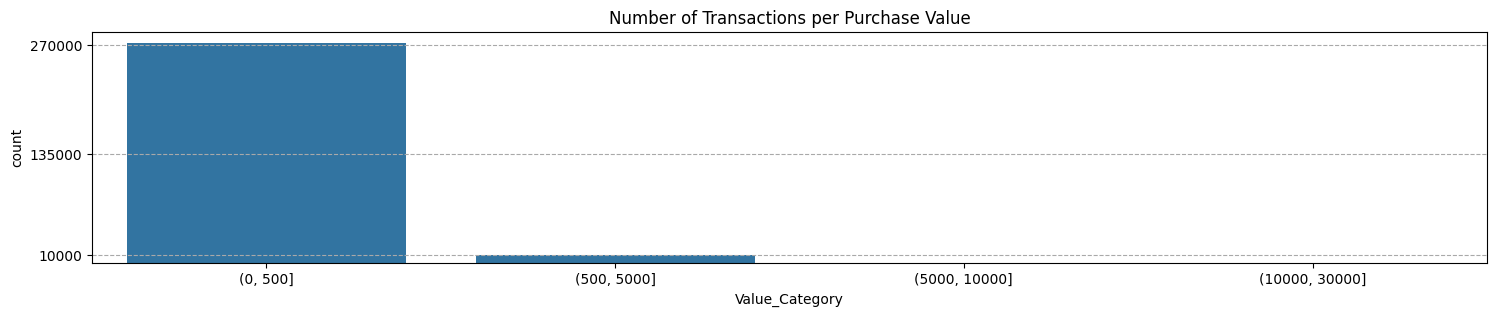

In [23]:
fig, ax = plt.subplots(figsize = (18,3))
sns.barplot(data = df['Value_Category'].value_counts().reset_index(), x = 'Value_Category', y = 'count')
ax.set_title('Number of Transactions per Purchase Value')
ax.set_yticks([10000, 135000, 270000])
ax.grid(axis = 'y', linestyle='--', color='darkgray')

Frauds per Value Category

In [43]:
frauds_per_category = df[df['Class'] == 1]['Value_Category'].value_counts().reset_index()

In [44]:
frauds_per_category

,Value_Category,count
0,"(0, 500]",414
1,"(500, 5000]",34
2,"(5000, 10000]",0
3,"(10000, 30000]",0


In [45]:
frauds_per_category_percentual = df[df['Class'] == 1]['Value_Category'].value_counts(True).reset_index()

In [46]:
frauds_per_category_percentual

,Value_Category,proportion
0,"(0, 500]",0.924107
1,"(500, 5000]",0.075893
2,"(5000, 10000]",0.000000
3,"(10000, 30000]",0.000000


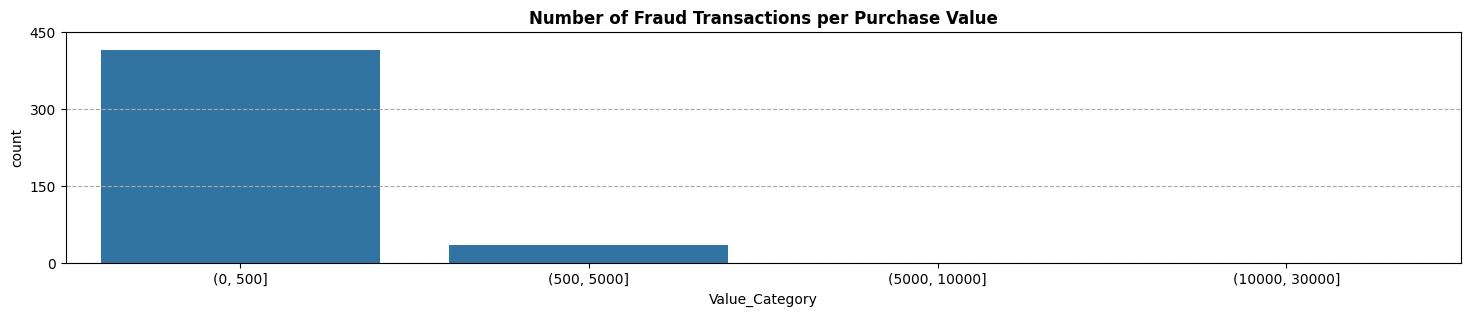

In [26]:
fig, ax = plt.subplots(figsize = (18,3))
sns.barplot(data = df[df['Class'] == 1]['Value_Category'].value_counts().reset_index(), x = 'Value_Category', y = 'count')
ax.set_title('Number of Fraud Transactions per Purchase Value', fontweight = 'bold')
ax.set_yticks(np.arange(0,451,150))
ax.grid(axis = 'y', linestyle='--', color='darkgray')

### Analysis over time

In [27]:
dataset['Time'].max()

np.float64(172792.0)

**Max Time is 172792, which means that the maximum amount of seconds elapsed between each the last transaction and the first is:**<br>
$$
172792 \text{ seconds} \quad \Rightarrow \quad \approx 48 \text{ hours}
$$

In [28]:
df= dataset[['Time', 'Class']]

In [29]:
minutes = np.arange(60,60*48,60)

In [30]:
minutes

array([  60,  120,  180,  240,  300,  360,  420,  480,  540,  600,  660,
        720,  780,  840,  900,  960, 1020, 1080, 1140, 1200, 1260, 1320,
       1380, 1440, 1500, 1560, 1620, 1680, 1740, 1800, 1860, 1920, 1980,
       2040, 2100, 2160, 2220, 2280, 2340, 2400, 2460, 2520, 2580, 2640,
       2700, 2760, 2820])

In [31]:
df['hour'] = pd.cut(df['Time'], 48, labels = np.arange(1,49,1))

C:\Users\adans\AppData\Local\Temp\ipykernel_25668\210974527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = pd.cut(df['Time'], 48, labels = np.arange(1,49,1))


In [32]:
all_frauds_timeline = df.query('Class == 1').groupby('hour')['Class'].count().reset_index().rename({'Class': 'Frauds'}, axis = 1)
frauds_first_24_h = df.query('Class == 1').groupby('hour')['Class'].count()[:24].reset_index().rename({'Class': 'Frauds'}, axis = 1)
frauds_last_24_h = df.query('Class == 1').groupby('hour')['Class'].count()[25:].reset_index().rename({'Class': 'Frauds'}, axis = 1)

C:\Users\adans\AppData\Local\Temp\ipykernel_25668\3896816896.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_frauds_timeline = df.query('Class == 1').groupby('hour')['Class'].count().reset_index().rename({'Class': 'Frauds'}, axis = 1)
C:\Users\adans\AppData\Local\Temp\ipykernel_25668\3896816896.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frauds_first_24_h = df.query('Class == 1').groupby('hour')['Class'].count()[:24].reset_index().rename({'Class': 'Frauds'}, axis = 1)
C:\Users\adans\AppData\Local\Temp\ipykernel_25668\3896816896.py:3: FutureWarning: The default of observed=False is deprecated a

Text(0.5, 1.0, 'Number of Frauds over time')

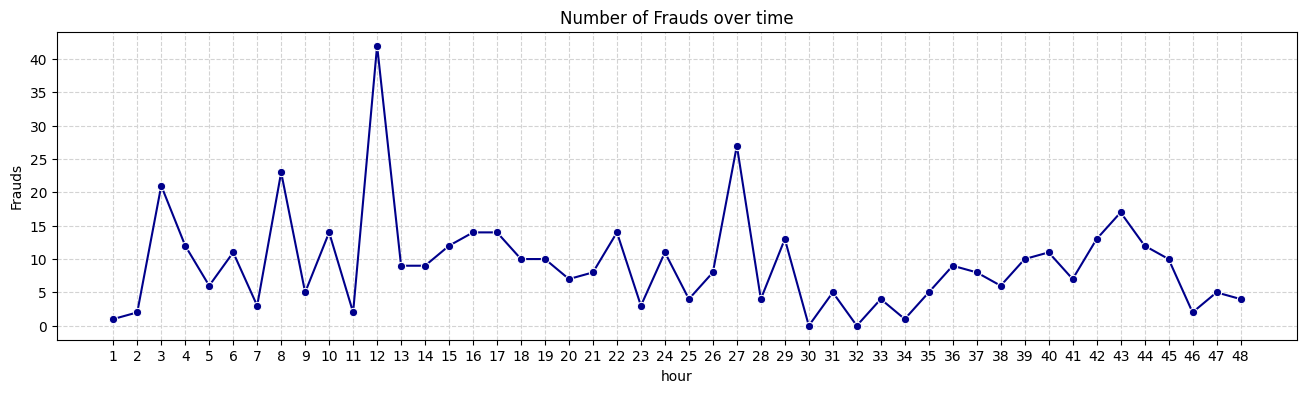

In [33]:
fig, ax = plt.subplots(figsize = (16,4))
sns.lineplot(data = all_frauds_timeline, x = 'hour', y = 'Frauds', color = 'darkblue', marker = 'o')
ax.set_xticks(np.arange(1, 49, 1))
ax.set_yticks(np.arange(0,all_frauds_timeline['Frauds'].max()+1,5))
ax.grid(linestyle='--', color='lightgray')
ax.set_title('Number of Frauds over time')

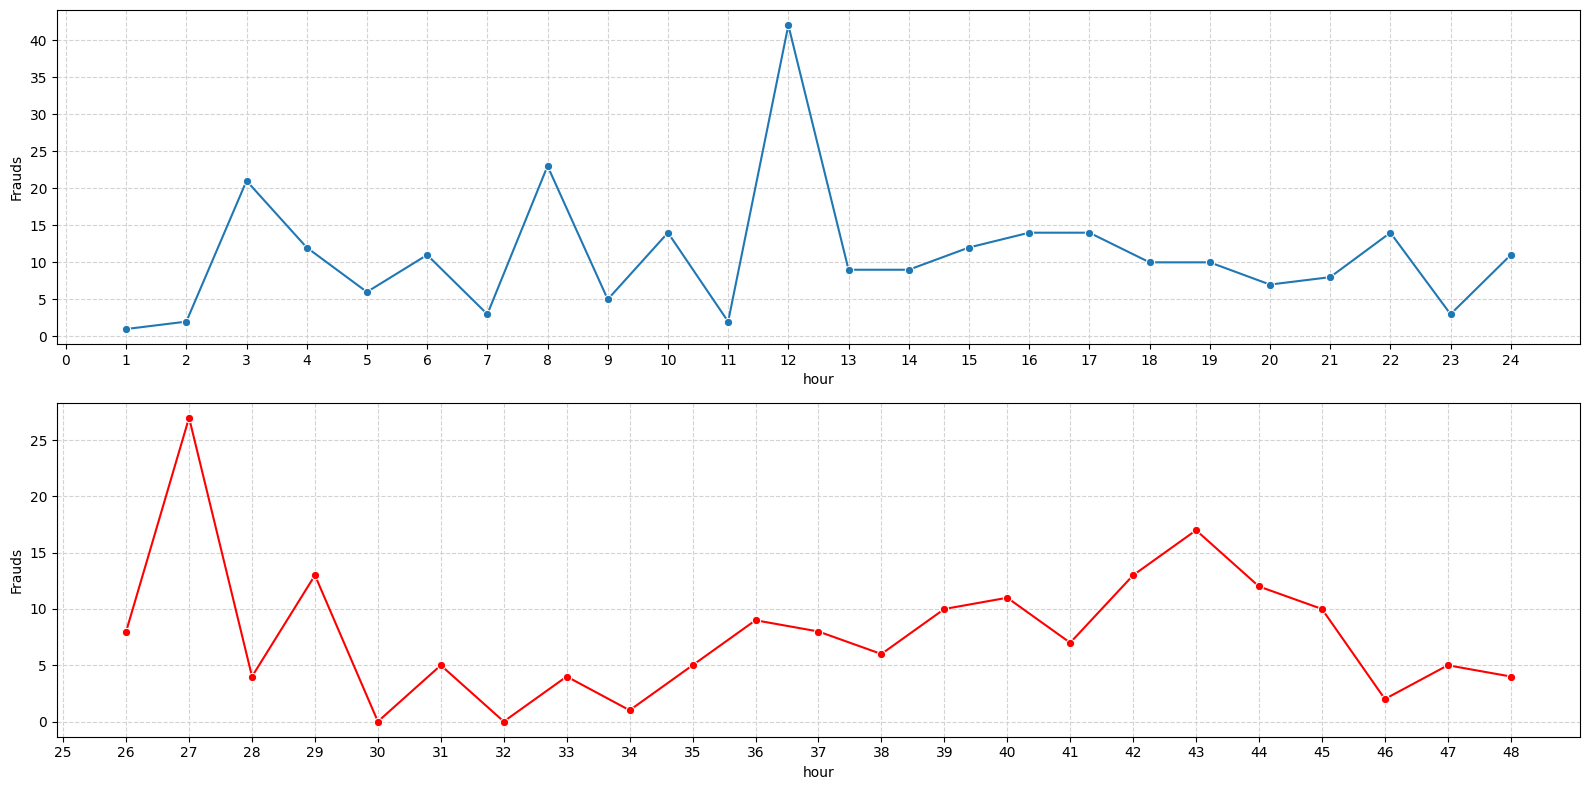

In [34]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (16,8))
sns.lineplot(data = frauds_first_24_h, x = 'hour', y = 'Frauds', marker = 'o', ax = ax1)
ax1.set_xticks(np.arange(0, 25, 1))
ax1.set_yticks(np.arange(0,frauds_first_24_h['Frauds'].max()+1,5))
ax1.grid(True, linestyle='--', color='lightgray')
sns.lineplot(data = frauds_last_24_h, x = 'hour', y = 'Frauds', color = 'red', marker = 'o', ax = ax2)
ax2.set_xticks(np.arange(25, 49, 1))
ax2.grid(True, linestyle='--', color='lightgray')


plt.tight_layout()
plt.show()

## Data Consolidation